# Pie Chart Stroke and Spacers

The `stroke` and the `color` aesthetics respectively set **line width** and **line color** of the pie sector arcs. 

The `stroke_side` parameter - "inner", "outer"(def), "both" - specifies where to show the arc.

By default `stroke` is 0, thus no arc is shown regardless of the value of `stroke_side` parameter.

Parameters `spacer_width` and `spacer_color` define lines between sectors. The default is a narrow segment of the same color as the plot background. Spacers are not applied to exploded sectors and to the sides of adjacent sectors.

In [1]:
import pandas as pd

from lets_plot.geo_data import *
from lets_plot import *

The geodata is provided by © OpenStreetMap contributors and is made available here under the Open Database License (ODbL).



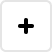
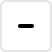
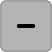
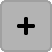
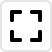
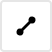
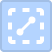
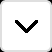
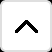
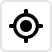
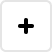
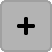
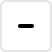
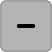
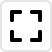
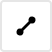
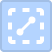
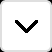
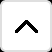
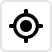

In [2]:
LetsPlot.setup_html()

In [3]:
mpg_df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv")
mpg_df.head(3)

Unnamed: 0 manufacturer model  displ  year  cyl       trans drv  cty  hwy  \
0           1         audi    a4    1.8  1999    4    auto(l5)   f   18   29   
1           2         audi    a4    1.8  1999    4  manual(m5)   f   21   29   
2           3         audi    a4    2.0  2008    4  manual(m6)   f   20   31   

  fl    class  
0  p  compact  
1  p  compact  
2  p  compact

In [4]:
ggplot(mpg_df) + theme_void() + geom_pie(aes(fill='class'), size=20) 

#### 1. `stroke` and `color`

In [5]:
palettes = scale_fill_brewer(palette='Pastel2') + \
           scale_color_brewer(palette='Set2')

In [6]:
ggplot(mpg_df) + theme_void() + \
    geom_pie(aes(fill='class', color='class'), size=20, stroke=7) + \
    palettes

#### 2. `stroke_side`

Note: `stroke=7` is added to parameters in order to make arks visible.

In [7]:
p = ggplot(mpg_df, aes(fill='class', color='class')) + theme_void() + palettes

gggrid([
  p + geom_pie(hole=0.3, stroke=7) + ggtitle("Outer stroke (Default)"),
  p + geom_pie(hole=0.3, stroke=7, stroke_side="Inner") + ggtitle("Inner stroke"),
  p + geom_pie(hole=0.3, stroke=7, stroke_side="both") + ggtitle("Inner & outer stroke")
]) + ggsize(1000, 200)



#### 3. `spacer_width` and  `spacer_color`

"Spacer" is a thin line separating the pie' slices.\
You can adjust width and color of spacers.

In [8]:
ggplot(mpg_df) + theme_void() + \
    geom_pie(aes(fill='class'), 
             size=20, hole=0.3,
             spacer_width=4, spacer_color='light-gray')

##### 3.1 Spacers with Exploded Sectors 

Spacers are not shown for exploded sectors.

In [9]:
mpg_df['explode'] = [0.2 if c == 'pickup' else 0.0 for c in mpg_df['class']]

ggplot(mpg_df) + theme_void() + \
    geom_pie(aes(fill='class', explode='explode'), 
             size=20, hole=0.3,
             stroke=2, color='black',
             stroke_side='both',
             spacer_width=4, spacer_color='light-gray')

#### 3. Pie Chart on Map

In [10]:
data = {
    "city": ["New York", "New York", "Philadelphia", "Philadelphia"],
    "est_pop_2020": [4_381_593, 3_997_959, 832_685, 748_846],
    "sex": ["female", "male", "female", "male"]
}

centroids = geocode_cities(data["city"]).get_centroids()

ggplot() + geom_livemap() + \
    geom_pie(aes(slice='est_pop_2020', fill='sex', size='est_pop_2020'),
             stat='identity', data=data, map=centroids, map_join='city', 
             hole=0.2, alpha=0.6,
             color='black', stroke=2, stroke_side='both',
             spacer_color='black', spacer_width=2) + \
    scale_size(range=[5,10], guide='none') + labs(fill="Gender")